In [5]:
import pandas as pd # importa a biblioteca pandas

In [6]:
df = pd.read_csv('dadosspam.csv') # importa base de dados

In [8]:
df.head() # exibe as 4 primeiras linhas do dataframe

,frequencia_palavras,presenca_links,num_anexos,comprimento_email,spam
0,6,0,1,793,0
1,3,0,1,698,0
2,7,1,1,455,1
3,4,1,1,810,0
4,6,0,3,620,1


In [11]:
X = df.drop('spam',axis=1) # exclui a coluna spam
y = df['spam'] # armazena os dados da coluna spam

In [13]:
X

,frequencia_palavras,presenca_links,num_anexos,comprimento_email
0,6,0,1,793
1,3,0,1,698
2,7,1,1,455
3,4,1,1,810
4,6,0,3,620
...,...,...,...,...
995,9,1,3,313
996,9,1,0,228
997,7,0,1,362
998,1,1,3,107


In [15]:
y

0      0
1      0
2      1
3      0
4      1
      ..
995    1
996    0
997    0
998    1
999    1
Name: spam, Length: 1000, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.3,
                                                random_state=42)

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,classification_report

In [23]:
model = SVC(kernel='linear') # cria modelo de support vector machine

In [25]:
model.fit(x_train,y_train) # treina o modelo de SVM

SVC(kernel='linear')

In [27]:
y_prev = model.predict(x_test) #realiza predições

In [29]:
y_prev # exibe as previsões

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1], d

In [31]:
x_test #exibe os dados de teste

,frequencia_palavras,presenca_links,num_anexos,comprimento_email
521,4,0,3,315
737,7,0,4,578
740,3,0,2,680
660,4,0,3,78
411,8,0,2,337
...,...,...,...,...
468,2,0,3,706
935,0,1,4,800
428,3,1,4,202
7,6,1,4,446


In [33]:
accuracy = accuracy_score(y_test, y_prev)
conf_matrix = confusion_matrix(y_test, y_prev)
prec = precision_score(y_test,y_prev)
f1 = f1_score(y_test,y_prev)
relatorio = classification_report(y_test,y_prev,target_names=['Não Spam','Spam'])
print(f'Precisão {prec:.2f}')
print(f'Acurácia: {accuracy:.2f}')
print(f'F1_score: {f1:.2f}')
print(conf_matrix)
print(relatorio)

Precisão 1.00
Acurácia: 0.99
F1_score: 0.99
[[149   0]
 [  4 147]]
              precision    recall  f1-score   support

    Não Spam       0.97      1.00      0.99       149
        Spam       1.00      0.97      0.99       151

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

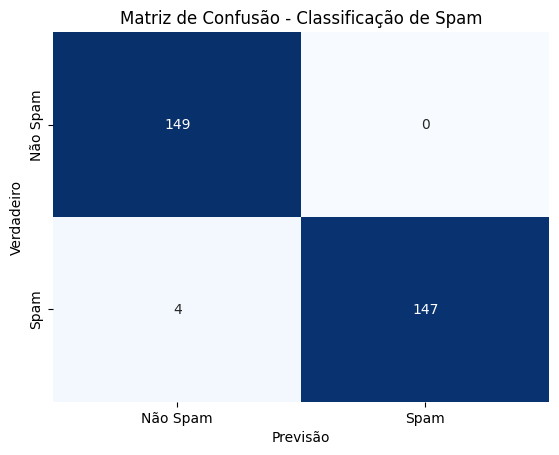

In [38]:
# cria matriz de confusão de forma visual xticks e yticks são os rótulos da matriz
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Não Spam', 'Spam'],
             yticklabels=['Não Spam', 'Spam']) 
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Classificação de Spam')
plt.show()

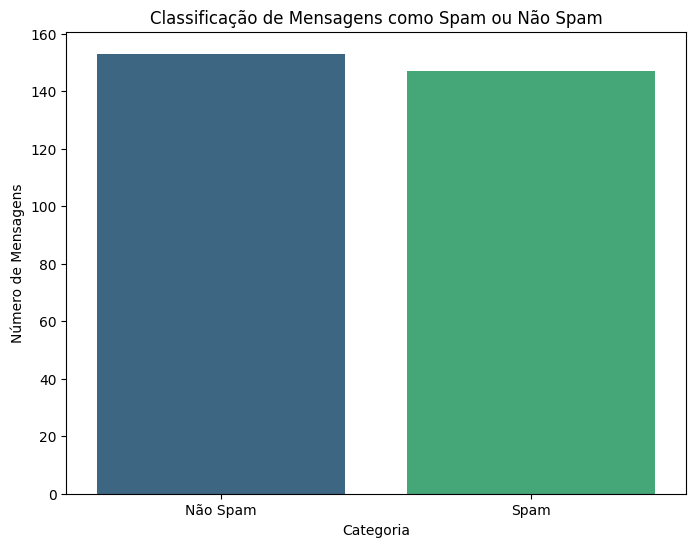

147
153


In [40]:
# Contagem de predições
spam_count = sum(y_prev)
non_spam_count = len(y_prev) - spam_count

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=['Não Spam', 'Spam'], y=[non_spam_count, spam_count], palette='viridis') # palete cor do heat map
plt.xlabel('Categoria')
plt.ylabel('Número de Mensagens')
plt.title('Classificação de Mensagens como Spam ou Não Spam')
plt.show()
print(spam_count)
print(non_spam_count)

In [43]:
df['spam'].value_counts()

spam
0    524
1    476
Name: count, dtype: int64

In [45]:
spam = sum(y_prev)
spam

147

In [46]:
len(y_prev) 

300